## 实验介绍
传统的环境质量评价往往从单个污染因子的角度出发，无法客观准确的反映多个污染因子之间相互作用对环境质量的影响。因此本实验基于空气中SO2、NO、NO2、NOx、PM10和PM2.5的含量数据，使用C4.5决策树进行模型构建，来对数据进行挖掘。

## 数据预处理
在某地实际监测的部分原始样本数据经预处理后如下图：
![](1_hjzl.png)
对于”空气等级”列，需要将标称型数据转换为数值型数据。


In [1]:
%pip install xlwt -q
%pip install openpyxl
%pip install matplotlib
%pip install pandas
%pip install xlrd -q

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 7.6/7.6 MB 454.0 kB/s eta 0:00:00
     -------------------------------------- 40.2/40.2 MB 264.9 kB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/61/cf/6e354304bcb9c6413c4e02a747b600061c21d38ba51e7e544ac7bc66aecc/threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/91/d4/3b4c8e5a30604df4c7518c562d4bf0502f2fa29221459226e140cf846512/joblib-1.2.0-py3-none-any.whl (297 kB)


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c3/dd/fab87d80ccd9636c1bca567a6e23ad14bd3cfbc5855db3797c326d895957/scikit_learn-1.1.3-cp39-cp39-win_amd64.whl (7.6 MB)
     -------------------------------------- 40.2/40.2 MB 359.3 kB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/91/d4/3b4c8e5a30604df4c7518c562d4bf0502f2fa29221459226e140cf846512/joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/61/cf/6e354304bcb9c6413c4e02a747b600061c21d38ba51e7e544ac7bc66aecc/threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c3/dd/fab87d80ccd9636c1bca567a6e23ad14bd3cfbc5855db3797c326d895957/scikit_learn-1.1.3-cp39-cp39-win_amd64.whl (7.6 MB)
     ------------------------------------ 298.0/298.0 KB 328.8 kB/s eta 0:00:00
     -------------------------------------- 40.2/40.2 MB 313.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Python 3.9.12\python.exe -m pip install --upgrade pip' command.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Start Code Here ###
# 将空气等级列的标称型数据转换为数值型数据
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl.workbook import Workbook

filepath = 'test.xls'

data = pd.read_excel(filepath)

display(data)

data.loc[(data[u'空气等级']=='I'),u'空气等级']=1
data.loc[(data[u'空气等级']=='II'),u'空气等级']=2
data.loc[(data[u'空气等级']=='III'),u'空气等级']=3
data.loc[(data[u'空气等级']=='IV'),u'空气等级']=4
data.loc[(data[u'空气等级']=='V'),u'空气等级']=5
data.loc[(data[u'空气等级']=='VI'),u'空气等级']=6
data.loc[(data[u'空气等级']=='VII'),u'空气等级']=7

dataT = data.values
data.to_excel('data.xlsx')
### End Code Here ###

,SO2,NO,NO2,NOx,PM10,PM2-5,空气等级
0,0.031,0.000,0.046,0.047,0.085,0.058,I
1,0.022,0.000,0.053,0.053,0.070,0.048,II
2,0.017,0.000,0.029,0.029,0.057,0.040,I
3,0.026,0.000,0.026,0.026,0.049,0.034,I
4,0.018,0.000,0.027,0.027,0.051,0.035,I
...,...,...,...,...,...,...,...
315,0.010,0.001,0.037,0.039,0.036,0.022,I
316,0.007,0.000,0.033,0.034,0.037,0.023,I
317,0.007,0.000,0.037,0.037,0.038,0.024,I
318,0.009,0.000,0.040,0.040,0.043,0.027,I


运行后打开data.xls，可以看到将空气等级列表转换为相应的数值：

![](2_hjzl.png)

## 模型构建
本实验我们采用C4.5决策树来进行模型构建。并使用交叉验证方法。

首先需要对数据进行训练集和测试集的划分，本实验以数据集中的80%的数据为训练集，20%为测试集。在上节中数据的变换时，需要将最后一列转换为int型。


In [4]:
### Start Code Here ###
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

# 使用train_test_split函数实现数据集的划分
train,test,train_target,test_target=train_test_split(dataT[:,:6],dataT[:,6],test_size = 0.2)

train_target=train_target.astype(int)
test_target=test_target.astype(int)
### End Code Here ###

In [5]:
# SVC训练 
from sklearn import svm
model = svm.SVC()
model.fit(train, train_target)
display(model.score(test, test_target)) #测试模型打分

0.859375

In [6]:
#*100
# SVC训练 
from sklearn import svm
model = svm.SVC()
model.fit(train*100, train_target)
display(model.score(test*100, test_target))
display(model.score(train*100, train_target))

0.859375

0.91796875

In [7]:
#重新调整*30
# SVC训练 
from sklearn import svm
model = svm.SVC()
model.fit(train*30, train_target)
display(model.score(test*30, test_target))
display(model.score(train*30, train_target))

0.859375

0.91796875

In [8]:
da = pd.read_excel('test1.xlsx')
prediction=model.predict(da.values[:,:6])
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

接下来，我们开始构建决策树模型，本实验使用sklearn库来实现模型的构建，并将训练结果可视化。

在构建模型时，我们使用了python的learning_curve函数，来得到不同大小的训练集，其交叉验证训练和测试的分数。

ROC AUC Decision Tree:  0.9647514819881441 0.016702294238697308
Best Test Score：1.0000


DecisionTreeClassifier(max_depth=5)

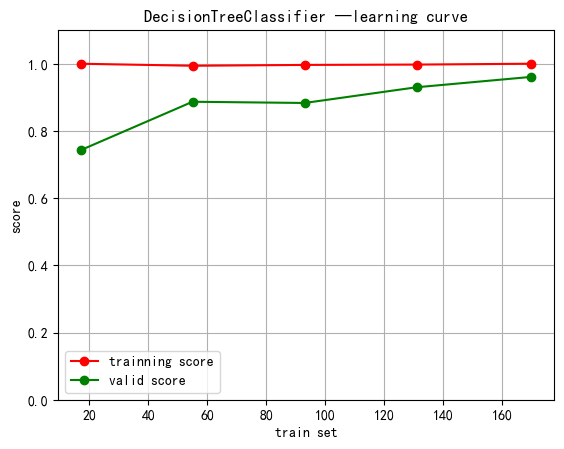

In [14]:
### Start Code Here ###

#构建决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#构建决策树模型clf
clf = DecisionTreeClassifier(max_depth=5)

scores = cross_val_score(clf, train*30, train_target, cv=3) 
print("ROC AUC Decision Tree: ", np.mean(scores), np.std(scores))


from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=3,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):

    plt.title("%s —learning curve" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("train set")
    plt.ylabel("score")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="trainning score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="valid score")
    plt.legend(loc="best")
    print("Best Test Score：{:.4f}".format(train_scores_mean[-1]))

plot_learning_curve(clf, train, train_target) 

clf.fit(train,train_target)

### End Code Here ###

运行后，可以看到训练集的大小与交叉验证分数成正比.
## 模型评价

我们计算不同深度训练集和测试集交叉验证得分。通过图表来选取最合适的深度值。

Best test score: 0.9570


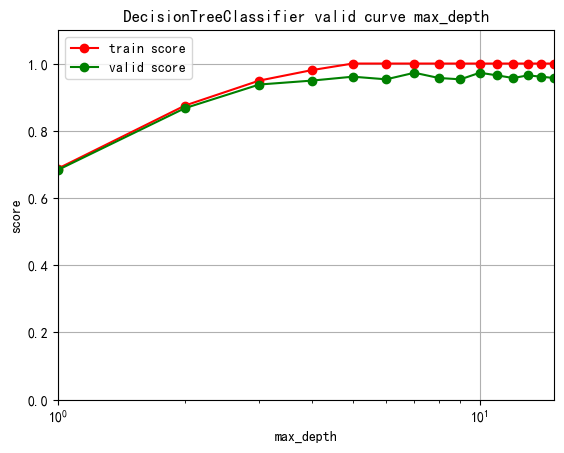

In [11]:
### Start Code Here ###

from sklearn.model_selection import validation_curve

#利用validation_curve计算不同深度训练集和测试集交叉验证得分
def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=3, n_jobs=1, scoring=None):
    plt.rcParams['font.sans-serif']=['SimHei']
    estimator_name = type(estimator).__name__
    plt.title(" %s valid curve %s "
              % (estimator_name,param_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("score")

    #通过调用validation_curve来计算训练集的得分cores和验证集的得分test_scores
    train_scores, test_scores = validation_curve(
      estimator, X, y, param_name=param_name, param_range=param_range,
     cv=cv, n_jobs=n_jobs, scoring=scoring)


    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="train score")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="valid score")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

plot_validation_curve(clf, train*30, train_target,
                      param_name, param_range)
### End Code Here ###

In [55]:
import pandas as pd
clf.fit(train,train_target)
da = pd.read_excel('test1.xlsx')
da.to_excel('读取的数据.xlsx')
display(da)
prediction=clf.predict(da.values[:,:6])
display(prediction)
prediction1=pd.DataFrame(prediction)
da[da.columns[6]]=prediction1
display(da)
da.to_excel('模型预测数据.xlsx')

,SO2,NO,NO2,Nox,PM10,PM2-5,空气等级
0,0.10,0.50,0.50,0.50,0.60,1.00,NaN
1,0.31,0.03,0.09,0.19,0.38,0.23,NaN
2,0.39,0.03,0.32,0.43,0.35,0.02,NaN
3,0.06,0.04,0.07,0.17,0.43,0.39,NaN
4,0.15,0.14,0.21,0.17,0.37,0.18,NaN
5,0.21,0.11,0.38,0.24,0.10,0.32,NaN
6,0.40,0.37,0.11,0.49,0.10,0.32,NaN
7,0.01,0.44,0.42,0.18,0.30,0.23,NaN
8,0.40,0.12,0.31,0.36,0.18,0.11,NaN
9,0.20,0.13,0.16,0.47,0.32,0.03,NaN


array([7, 3, 5, 3, 3, 3, 5, 3, 4, 5, 3, 5, 3, 3, 3, 2, 5, 2, 4, 3, 3, 5,
       5, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3])

,SO2,NO,NO2,Nox,PM10,PM2-5,空气等级
0,0.10,0.50,0.50,0.50,0.60,1.00,7
1,0.31,0.03,0.09,0.19,0.38,0.23,3
2,0.39,0.03,0.32,0.43,0.35,0.02,5
3,0.06,0.04,0.07,0.17,0.43,0.39,3
4,0.15,0.14,0.21,0.17,0.37,0.18,3
5,0.21,0.11,0.38,0.24,0.10,0.32,3
6,0.40,0.37,0.11,0.49,0.10,0.32,5
7,0.01,0.44,0.42,0.18,0.30,0.23,3
8,0.40,0.12,0.31,0.36,0.18,0.11,4
9,0.20,0.13,0.16,0.47,0.32,0.03,5


运行后，可以看最好的测试分数为0.9730，即测试集最高的正确率为96.48%。注：每次运行结果可能不同。
## 实验总结
本实验使用了C4.5决策树模型对数据进行挖掘，对给出的环境因子指标数据进行建模，利用模型结果对环境质量状况进行评价。
